Get data file

Define X = images and y = multi-classes labels

preprocessing

data split

## Data set for testing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('age_gender.csv', nrows= 1000) 
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
995,1,0,1,20170103213335661.jpg.chip.jpg,115 137 156 161 166 168 145 145 114 130 136 13...
996,1,0,1,20170103213137956.jpg.chip.jpg,35 55 62 68 90 104 103 104 120 129 117 126 132...
997,1,0,1,20161220220457473.jpg.chip.jpg,242 240 216 183 202 201 198 196 197 198 201 20...
998,1,0,1,20161220220143105.jpg.chip.jpg,54 83 97 115 132 139 134 139 64 37 31 66 149 7...


In [3]:
data['ethnicity'].value_counts()

2    356
0    256
3    234
4    139
1     15
Name: ethnicity, dtype: int64

In [4]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [5]:
data['pixels'] = data['pixels'].apply(lambda x: x/255)

In [6]:
X = np.array(data['pixels'].tolist())
y = np.array(data['ethnicity'])

In [7]:
y.shape

(1000,)

In [8]:
X = X.reshape(X.shape[0],48,48,1)

In [9]:
X.shape

(1000, 48, 48, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 48, 48, 1), (300, 48, 48, 1), (700,), (300,))

In [13]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=5)
y_cat_test = to_categorical(y_test, num_classes=5)


In [14]:
y_cat_train.shape, y_cat_test.shape

((700, 5), (300, 5))

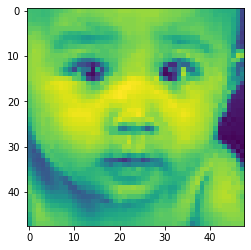

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X[0]);

## Starting basic model

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

We will have to change input shape, kernel.
we should use different layers to reduce smoothly before flattening!


In [18]:
#### 1. ARCHITECTURE
model = Sequential()

model.add(layers.Conv2D(16, (3,3), input_shape=(48, 48, 1), activation="relu"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

#model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))

#model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Flatten())

#model.add(layers.Dense(50, activation='relu')) # intermediate layer

model.add(layers.Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 5)                 42325     
                                                                 
Total params: 42,485
Trainable params: 42,485
Non-trainable params: 0
_________________________________________________________________


In [20]:
#### 2. COMPILATION
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
#es = EarlyStopping(patience = 10, restore_best_weights = True)
#### 3. FIT
history = model.fit(X_train, y_cat_train, 
          batch_size=16, 
          epochs=100, 
          validation_split=0.3)
#,
          #callbacks=[es],
          #verbose = 2)

Epoch 1/100
31/31 [==============================] - 2s 36ms/step - loss: 1.4223 - accuracy: 0.3190 - val_loss: 1.3228 - val_accuracy: 0.3886
Epoch 2/100
31/31 [==============================] - 1s 18ms/step - loss: 1.3283 - accuracy: 0.3988 - val_loss: 1.2573 - val_accuracy: 0.5071
Epoch 3/100
31/31 [==============================] - 0s 15ms/step - loss: 1.2300 - accuracy: 0.5215 - val_loss: 1.2226 - val_accuracy: 0.4171
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 1.1363 - accuracy: 0.5440 - val_loss: 1.1693 - val_accuracy: 0.4502
Epoch 5/100
31/31 [==============================] - 0s 14ms/step - loss: 1.0033 - accuracy: 0.6319 - val_loss: 1.0786 - val_accuracy: 0.5782
Epoch 6/100
31/31 [==============================] - 0s 16ms/step - loss: 0.9392 - accuracy: 0.6687 - val_loss: 1.0573 - val_accuracy: 0.5972
Epoch 7/100
31/31 [==============================] - 0s 14ms/step - loss: 0.8335 - accuracy: 0.7362 - val_loss: 1.0194 - val_accuracy: 0.5924
Epoch 

31/31 [==============================] - 0s 16ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 1.1152 - val_accuracy: 0.6872
Epoch 59/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 1.1305 - val_accuracy: 0.6872
Epoch 60/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 1.1323 - val_accuracy: 0.6872
Epoch 61/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 1.1235 - val_accuracy: 0.7014
Epoch 62/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 1.1083 - val_accuracy: 0.6872
Epoch 63/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.9980 - val_loss: 1.1758 - val_accuracy: 0.6777
Epoch 64/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 1.1372 - val_accuracy: 0.6919
Epoch 65/100

Remember to plot history!

In [22]:
# evaluate on the test data
print(model.evaluate(X_test, y_cat_test, verbose=0))

[1.80713951587677, 0.5933333039283752]
